### 1. Read and understand the data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [30]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [58]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
labels= pd.read_csv("labels.csv")

In [6]:
labels.shape

(18305, 5)

In [7]:
account_details= pd.read_csv("account_details.csv")

In [8]:
account_details.shape

(18305, 9)

In [9]:
account_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18305 entries, 0 to 18304
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             18305 non-null  object 
 1   MM             18305 non-null  int64  
 2   CPT            1592 non-null   float64
 3   REV_CD         18305 non-null  int64  
 4   Type           18305 non-null  int64  
 5   imt            18305 non-null  bool   
 6   Expect_Amount  18305 non-null  float64
 7   TotPayment     18305 non-null  float64
 8   Code           9740 non-null   object 
dtypes: bool(1), float64(3), int64(3), object(2)
memory usage: 1.1+ MB


In [10]:
account_details.describe()

,MM,CPT,REV_CD,Type,Expect_Amount,TotPayment
count,18305.000000,1592.00000,18305.000000,18305.000000,18305.000000,18305.000000
mean,66.513084,32403.09108,474.827643,1.625567,25073.042457,19551.072959
std,61.823697,10102.79031,199.630701,0.483989,22619.856617,19274.686331
min,1.000000,410.00000,250.000000,1.000000,0.000000,0.000000
25%,8.000000,33285.00000,300.000000,1.000000,1342.000000,1086.000000
50%,101.000000,36569.00000,403.000000,2.000000,16068.620000,14735.800000
75%,108.000000,36590.00000,636.000000,2.000000,42916.140000,32352.440000
max,203.000000,37197.00000,943.000000,2.000000,138125.110000,186732.400000


In [12]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18305 entries, 0 to 18304
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   18305 non-null  object 
 1   Amount_Due           18305 non-null  float64
 2   AR_Dollar_threshold  18305 non-null  bool   
 3   AR_Percentage        18305 non-null  float64
 4   AR_Exist             18305 non-null  bool   
dtypes: bool(2), float64(2), object(1)
memory usage: 464.9+ KB


In [11]:
labels.describe()

,Amount_Due,AR_Percentage
count,18305.000000,18305.000000
mean,6059.637282,0.188729
std,15282.359594,0.603247
min,-1236.650000,0.000000
25%,0.000000,0.000000
50%,215.080000,0.020357
75%,9299.150000,0.239047
max,270319.000000,44.389241


In [17]:
account_details.columns

Index(['ID', 'MM', 'CPT', 'REV_CD', 'Type', 'imt', 'Expect_Amount',
       'TotPayment', 'Code'],
      dtype='object')

In [15]:
labels.columns

Index(['ID', 'Amount_Due', 'AR_Dollar_threshold', 'AR_Percentage', 'AR_Exist'], dtype='object')

In [20]:
labels.head(10)

,ID,Amount_Due,AR_Dollar_threshold,AR_Percentage,AR_Exist
0,TEDEL21429317,70.38,False,1.000000,True
1,TEGSM76438944,6.01,False,0.029606,True
2,TEGSM76438944,6.01,False,0.029606,True
3,TEGSM76757665,5.22,False,0.134087,True
4,TEGSM78301736,398.00,True,1.000000,True
5,TEGSM78301736,398.00,True,1.000000,True
6,TEGSM78301736,398.00,True,1.000000,True
7,TEGSM78328200,1342.00,True,1.000000,True
8,TEGSM78328200,1342.00,True,1.000000,True
9,TEGSM78328200,1342.00,True,1.000000,True


In [21]:
account_details.head(10)

,ID,MM,CPT,REV_CD,Type,imt,Expect_Amount,TotPayment,Code
0,TEDEL21429317,202,NaN,943,2,False,70.38,0.00,Other
1,TEGSM76438944,12,NaN,921,2,False,203.00,24.08,XR001
2,TEGSM76438944,12,NaN,320,2,False,203.00,24.08,XR001
3,TEGSM76757665,102,NaN,320,2,False,38.93,29.59,Other
4,TEGSM78301736,203,NaN,350,1,False,398.00,0.00,Other
5,TEGSM78301736,203,NaN,636,1,False,398.00,0.00,Other
6,TEGSM78301736,203,NaN,636,1,False,398.00,0.00,Other
7,TEGSM78328200,203,NaN,636,2,False,1342.00,885.68,Other
8,TEGSM78328200,203,NaN,341,2,False,1342.00,885.68,Other
9,TEGSM78328200,203,NaN,343,2,False,1342.00,885.68,Other


### 2. Clean the data

In [22]:
account_details.isna().sum()

ID                   0
MM                   0
CPT              16713
REV_CD               0
Type                 0
imt                  0
Expect_Amount        0
TotPayment           0
Code              8565
dtype: int64

In [23]:
round(100*(account_details.isnull().sum()/len(account_details.index)), 2)

ID                0.00
MM                0.00
CPT              91.30
REV_CD            0.00
Type              0.00
imt               0.00
Expect_Amount     0.00
TotPayment        0.00
Code             46.79
dtype: float64

In [24]:
account_details.drop('CPT', inplace=True, axis=1)

In [25]:
account_details.head(20)

,ID,MM,REV_CD,Type,imt,Expect_Amount,TotPayment,Code
0,TEDEL21429317,202,943,2,False,70.38,0.00,Other
1,TEGSM76438944,12,921,2,False,203.00,24.08,XR001
2,TEGSM76438944,12,320,2,False,203.00,24.08,XR001
3,TEGSM76757665,102,320,2,False,38.93,29.59,Other
4,TEGSM78301736,203,350,1,False,398.00,0.00,Other
5,TEGSM78301736,203,636,1,False,398.00,0.00,Other
6,TEGSM78301736,203,636,1,False,398.00,0.00,Other
7,TEGSM78328200,203,636,2,False,1342.00,885.68,Other
8,TEGSM78328200,203,341,2,False,1342.00,885.68,Other
9,TEGSM78328200,203,343,2,False,1342.00,885.68,Other


In [26]:
account_details['REV_CD'].value_counts().head(10).sum()

16477

<AxesSubplot:ylabel='Type'>

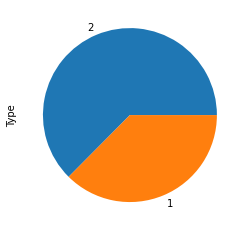

In [28]:
account_details['Type'].value_counts().plot.pie()

<AxesSubplot:ylabel='imt'>

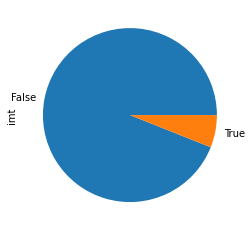

In [29]:
account_details['imt'].value_counts().plot.pie()

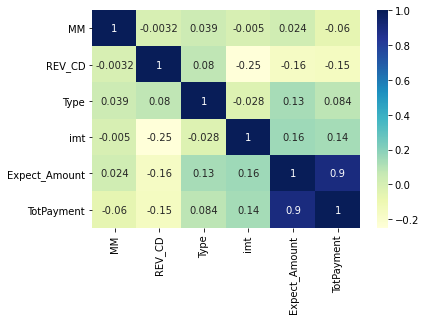

In [31]:
sns.heatmap(account_details.corr(), cmap="YlGnBu", annot = True)
plt.show()

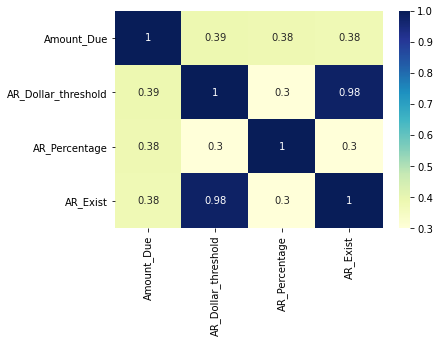

In [32]:
sns.heatmap(labels.corr(), cmap="YlGnBu", annot = True)
plt.show()

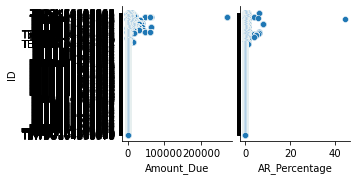

In [33]:
sns.pairplot(labels, x_vars=['Amount_Due','AR_Percentage'], y_vars='ID',kind='scatter')
plt.show()

<AxesSubplot:xlabel='Expect_Amount'>

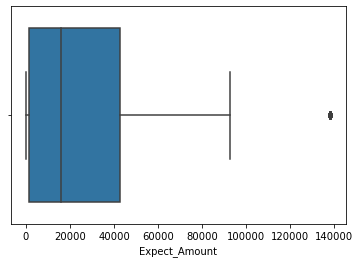

In [34]:
sns.boxplot(account_details['Expect_Amount'])

<AxesSubplot:xlabel='TotPayment'>

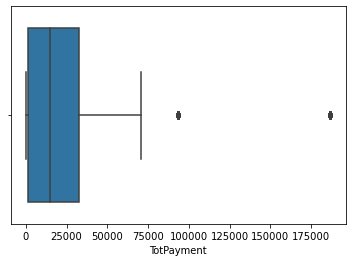

In [35]:
sns.boxplot(account_details['TotPayment'])

<AxesSubplot:xlabel='REV_CD'>

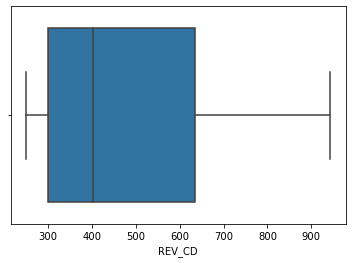

In [36]:
sns.boxplot(account_details['REV_CD'])

In [37]:
# Merging on 'ID'
New_df = pd.merge(account_details, labels, how='inner', on='ID')

In [38]:
New_df

,ID,MM,REV_CD,Type,imt,Expect_Amount,TotPayment,Code,Amount_Due,AR_Dollar_threshold,AR_Percentage,AR_Exist
0,TEDEL21429317,202,943,2,False,70.38,0.00,Other,70.38,False,1.000000,True
1,TEGSM76438944,12,921,2,False,203.00,24.08,XR001,6.01,False,0.029606,True
2,TEGSM76438944,12,921,2,False,203.00,24.08,XR001,6.01,False,0.029606,True
3,TEGSM76438944,12,320,2,False,203.00,24.08,XR001,6.01,False,0.029606,True
4,TEGSM76438944,12,320,2,False,203.00,24.08,XR001,6.01,False,0.029606,True
...,...,...,...,...,...,...,...,...,...,...,...,...
452860,TEWBO104339778,203,710,2,False,2335.00,2335.00,NaN,0.00,False,0.000000,False
452861,TEWBO104339778,203,710,2,False,2335.00,2335.00,NaN,0.00,False,0.000000,False
452862,TEWBO104339778,203,710,2,False,2335.00,2335.00,NaN,0.00,False,0.000000,False
452863,TEWBO104339778,203,710,2,False,2335.00,2335.00,NaN,0.00,False,0.000000,False


In [39]:
New_df.shape

(452865, 12)

In [40]:
New_df['Amount_Due'].value_counts()

0.00        139723
11738.72      3136
16819.21      2916
22387.25      2809
9638.47       2809
             ...  
190.37           1
208.00           1
5.22             1
400.01           1
105.80           1
Name: Amount_Due, Length: 468, dtype: int64

Deleting Amount value is equal to 0 because of no due

In [41]:
New_df = New_df.loc[~((New_df['Amount_Due'] == 0) | (New_df['Amount_Due'] == 0))]
New_df.head(10)

,ID,MM,REV_CD,Type,imt,Expect_Amount,TotPayment,Code,Amount_Due,AR_Dollar_threshold,AR_Percentage,AR_Exist
0,TEDEL21429317,202,943,2,False,70.38,0.00,Other,70.38,False,1.000000,True
1,TEGSM76438944,12,921,2,False,203.00,24.08,XR001,6.01,False,0.029606,True
2,TEGSM76438944,12,921,2,False,203.00,24.08,XR001,6.01,False,0.029606,True
3,TEGSM76438944,12,320,2,False,203.00,24.08,XR001,6.01,False,0.029606,True
4,TEGSM76438944,12,320,2,False,203.00,24.08,XR001,6.01,False,0.029606,True
5,TEGSM76757665,102,320,2,False,38.93,29.59,Other,5.22,False,0.134087,True
6,TEGSM78301736,203,350,1,False,398.00,0.00,Other,398.00,True,1.000000,True
7,TEGSM78301736,203,350,1,False,398.00,0.00,Other,398.00,True,1.000000,True
8,TEGSM78301736,203,350,1,False,398.00,0.00,Other,398.00,True,1.000000,True
9,TEGSM78301736,203,636,1,False,398.00,0.00,Other,398.00,True,1.000000,True


In [50]:
New_df.shape

(313142, 12)

In [71]:
New_df['AR_Exist'].value_counts()

True     308219
False      4923
Name: AR_Exist, dtype: int64

<AxesSubplot:>

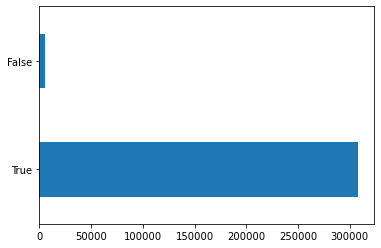

In [72]:
New_df['AR_Exist'].value_counts().plot.barh()

<AxesSubplot:xlabel='AR_Percentage', ylabel='Density'>

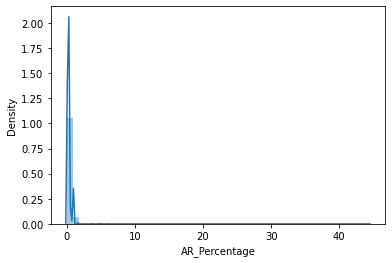

In [73]:
sns.distplot(New_df['AR_Percentage'])

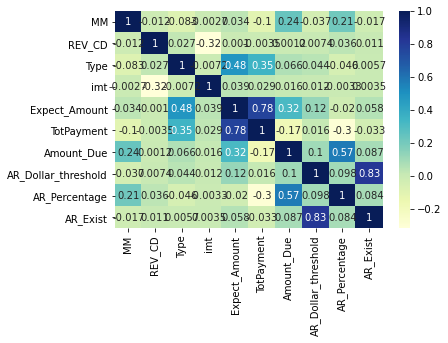

In [74]:
sns.heatmap(New_df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [75]:
New_df['MM'].value_counts()

105    20810
9      20017
108    17403
111    17044
2      15191
5      14396
103    14378
106    13977
112    13642
8      13359
110    12758
203    12310
109    12161
7      11845
104    11569
3      11307
107     9699
6       9694
12      9305
201     9239
11      8851
102     7783
10      7022
202     6824
101     6450
1       3855
4       2253
Name: MM, dtype: int64

In [42]:
New_df['Code'].value_counts()

MR080    168276
Other     28325
HR004     17326
HR027      9755
MR076      9592
MR081      8255
MR103      6958
HR006      6315
BR049      6026
BR074      4898
MR098      4810
BR029      4762
HR014      3579
MR083      3204
MR036      2819
XR001      2813
PR002      2758
XR020      2704
XR006      1936
MR021      1682
MR023      1681
MR157      1518
MR032      1478
HR044      1089
HR028       976
MR042       914
BR016       841
BR078       818
BR042       793
MR077       784
BR048       729
HR058       729
BR014       681
BR070       676
BR009       530
PR021       529
MR172       484
MR094       400
HR001       324
MR029       324
HR040        17
HR068        16
MR063         9
PR001         4
MR116         4
BR001         1
Name: Code, dtype: int64

#### 3. Prepare the data

In [43]:
grouped_df = New_df.groupby('ID')['TotPayment'].sum()
grouped_df = grouped_df.reset_index()
grouped_df

,ID,TotPayment
0,TEDEL19469808,12396672.00
1,TEDEL19519236,22125869.00
2,TEDEL19519953,1250.00
3,TEDEL19545547,4441434.48
4,TEDEL19575837,2000.00
...,...,...
472,TEWBO103624304,121.44
473,TEWBO103880483,0.00
474,TEWBO103938880,2506.18
475,TEWBO104106714,0.00


In [44]:
grouped_df1 = New_df.groupby('ID')['Amount_Due'].sum()
grouped_df1 = grouped_df1.reset_index()
grouped_df1

,ID,Amount_Due
0,TEDEL19469808,3250944.00
1,TEDEL19519236,3651058.53
2,TEDEL19519953,27600.00
3,TEDEL19545547,438230.52
4,TEDEL19575837,2016.00
...,...,...
472,TEWBO103624304,70.56
473,TEWBO103880483,13320.00
474,TEWBO103938880,1064.96
475,TEWBO104106714,171.12


In [45]:
grouped_df = pd.merge(grouped_df, grouped_df1, on='ID', how='inner')
grouped_df.head()

,ID,TotPayment,Amount_Due
0,TEDEL19469808,12396672.00,3250944.00
1,TEDEL19519236,22125869.00,3651058.53
2,TEDEL19519953,1250.00,27600.00
3,TEDEL19545547,4441434.48,438230.52
4,TEDEL19575837,2000.00,2016.00


In [46]:
frequency = New_df.groupby('ID')['AR_Percentage'].count()
frequency = frequency.reset_index()
frequency.columns = ['ID', 'AR_Percentage']
frequency

,ID,AR_Percentage
0,TEDEL19469808,576
1,TEDEL19519236,841
2,TEDEL19519953,25
3,TEDEL19545547,441
4,TEDEL19575837,4
...,...,...
472,TEWBO103624304,1
473,TEWBO103880483,36
474,TEWBO103938880,1
475,TEWBO104106714,4


In [47]:
grouped_df = pd.merge(grouped_df, frequency, on='ID', how='inner')
grouped_df.columns = ['ID', 'TotPayment', 'Amount_Due', 'AR_Percentage']
grouped_df.head()

,ID,TotPayment,Amount_Due,AR_Percentage
0,TEDEL19469808,12396672.00,3250944.00,576
1,TEDEL19519236,22125869.00,3651058.53,841
2,TEDEL19519953,1250.00,27600.00,25
3,TEDEL19545547,4441434.48,438230.52,441
4,TEDEL19575837,2000.00,2016.00,4


In [48]:
grouped_df['AR_Percentage'].sum()

313142

{'whiskers': [<matplotlib.lines.Line2D at 0x253d3d3f9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x253d3d3f250>,
 'boxes': [<matplotlib.lines.Line2D at 0x253d3d3fbe0>],
 'medians': [<matplotlib.lines.Line2D at 0x253d4077af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x253d4077490>],
 'means': []}

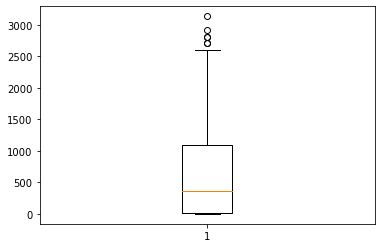

In [54]:
# 1. outlier treatment
plt.boxplot(grouped_df['AR_Percentage'])

In [55]:
# two types of outliers:
# - statistical
# - domain specific

In [56]:
# removing (statistical) outliers
Q1 = grouped_df.TotPayment.quantile(0.05)
Q3 = grouped_df.TotPayment.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.TotPayment >= Q1 - 1.5*IQR) & (grouped_df.TotPayment <= Q3 + 1.5*IQR)]

# outlier treatment for Amount_Due
Q1 = grouped_df.Amount_Due.quantile(0.05)
Q3 = grouped_df.Amount_Due.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.Amount_Due >= Q1 - 1.5*IQR) & (grouped_df.Amount_Due <= Q3 + 1.5*IQR)]

# outlier treatment for AR_Percentage
Q1 = grouped_df.AR_Percentage.quantile(0.05)
Q3 = grouped_df.AR_Percentage.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.AR_Percentage >= Q1 - 1.5*IQR) & (grouped_df.AR_Percentage <= Q3 + 1.5*IQR)]

In [59]:
# 2. rescaling
rfm_df = grouped_df[['TotPayment', 'Amount_Due', 'AR_Percentage']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(475, 3)

In [60]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['TotPayment', 'Amount_Due', 'AR_Percentage']
rfm_df_scaled.head()

,TotPayment,Amount_Due,AR_Percentage
0,-0.239058,-0.320146,-0.104143
1,0.079122,-0.292291,0.261326
2,-0.644434,-0.544549,-0.864044
3,-0.499224,-0.515962,-0.290326
4,-0.644410,-0.546330,-0.893006


#### 4. Modelling

In [61]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [62]:
kmeans.labels_

array([0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 1, 2,
       2, 0, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1,
       2, 2, 0, 2, 0, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 1, 2,
       1, 1, 1, 0, 2, 2, 2, 1, 1, 1, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 2, 1, 2, 0, 1, 1, 2, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2,
       0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 2, 1, 0, 0, 1, 0, 1, 0, 2, 1, 0,
       2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 1, 0, 1, 0, 3, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1,

Finding the Optimal Number of Clusters
SSD

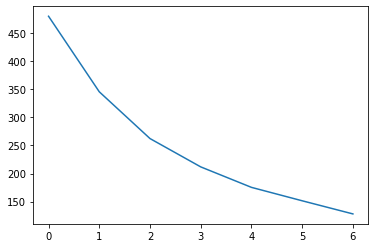

In [63]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [65]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6980991164740384
For n_clusters=3, the silhouette score is 0.6166177662707069
For n_clusters=4, the silhouette score is 0.6205885990278337
For n_clusters=5, the silhouette score is 0.5696260221602801
For n_clusters=6, the silhouette score is 0.5653707904812806
For n_clusters=7, the silhouette score is 0.5488527723704397
For n_clusters=8, the silhouette score is 0.5276764071859131


In [66]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [67]:
kmeans.labels_

array([0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2,
       2, 0, 1, 1, 1, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 1,
       2, 2, 0, 2, 0, 2, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 0, 0, 2, 1, 2, 2,
       1, 1, 1, 0, 2, 2, 2, 1, 1, 1, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 2, 1, 2, 0, 1, 1, 2, 1, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2,
       0, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 2, 1, 0, 0, 1, 0, 1, 0, 2, 1, 0,
       2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 1,
       2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1,

In [68]:
# assign the label
grouped_df['cluster_id'] = kmeans.labels_
grouped_df.head()

,ID,TotPayment,Amount_Due,AR_Percentage,cluster_id
0,TEDEL19469808,12396672.00,3250944.00,576,0
1,TEDEL19519236,22125869.00,3651058.53,841,2
2,TEDEL19519953,1250.00,27600.00,25,0
3,TEDEL19545547,4441434.48,438230.52,441,0
4,TEDEL19575837,2000.00,2016.00,4,0


<AxesSubplot:xlabel='cluster_id', ylabel='TotPayment'>

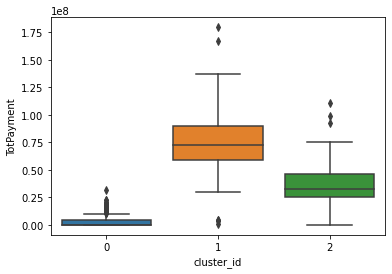

In [69]:
# plot
sns.boxplot(x='cluster_id', y='TotPayment', data=grouped_df)

<AxesSubplot:xlabel='cluster_id', ylabel='Amount_Due'>

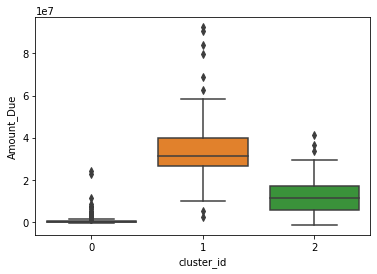

In [70]:
# plot
sns.boxplot(x='cluster_id', y='Amount_Due', data=grouped_df)